In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
from matplotlib.image import imread

In [3]:
train_path = "/kaggle/input/cell-images/cell_images/train"
test_path = "/kaggle/input/cell-images/cell_images/test"

In [4]:
os.listdir(test_path)

['uninfected', 'parasitized']

In [5]:
os.listdir(train_path)

['uninfected', 'parasitized']

In [6]:
para_cell = "/kaggle/input/cell-images/cell_images/train/parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png"

In [7]:
imread(para_cell).shape

(148, 142, 3)

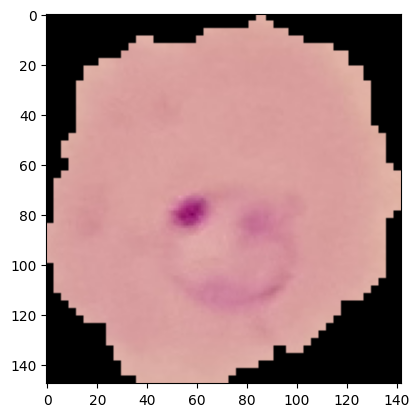

In [8]:
plt.imshow(imread(para_cell))

In [9]:
uninfected_cell = "/kaggle/input/cell-images/cell_images/train/uninfected/C100P61ThinF_IMG_20150918_144104_cell_128.png"

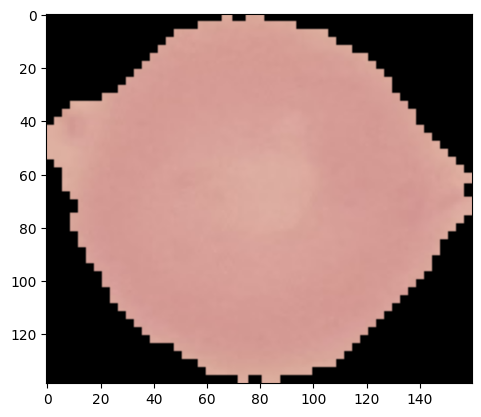

In [10]:
plt.imshow(imread(uninfected_cell))

In [11]:
len(os.listdir("/kaggle/input/cell-images/cell_images/train/parasitized"))

12480

In [12]:
len(os.listdir("/kaggle/input/cell-images/cell_images/train/uninfected"))

12480

In [13]:
len(os.listdir("/kaggle/input/cell-images/cell_images/test/parasitized"))

1300

In [14]:
len(os.listdir("/kaggle/input/cell-images/cell_images/test/uninfected"))

1300

In [15]:
dim1=[]
dim2=[]

for image_filename in os.listdir("/kaggle/input/cell-images/cell_images/test/uninfected"):
    img = imread("/kaggle/input/cell-images/cell_images/test/uninfected/" + image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


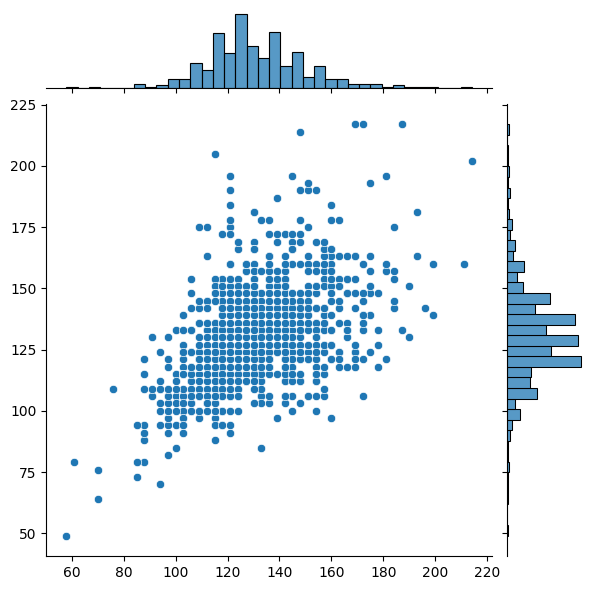

In [16]:
sns.jointplot(x=dim1,y=dim2)

In [17]:
np.mean(dim1)

130.92538461538462

In [18]:
np.mean(dim2)

130.75

In [19]:
image_shape=(130,130,3)

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-08-16 06:00:52.572559: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-16 06:00:52.572656: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-16 06:00:52.745669: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [21]:
image_gen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest')

In [22]:
para_img = imread(para_cell)

In [23]:
para_img.max()

0.9098039

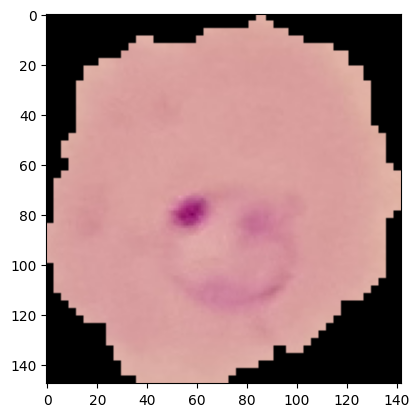

In [24]:
plt.imshow(para_img)

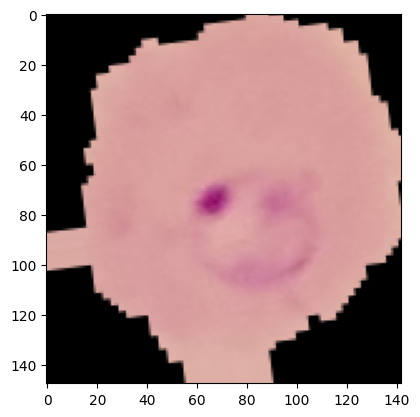

In [25]:
plt.imshow(image_gen.random_transform(para_img))

In [26]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [27]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [28]:
from tensorflow.keras.models import Sequential

In [29]:
from tensorflow.keras.layers import Dense,Activation, Conv2D, MaxPooling2D, Dropout, Flatten, Input
from tensorflow.keras.optimizers import Adam

In [30]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,662,209 (6.34 MB)

 Trainable params: 1,662,209 (6.34 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [34]:
batch_size=16

In [35]:
image_shape[:2]

(130, 130)

In [36]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [37]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [38]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [39]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [40]:
model.fit(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


   1/1560 ━━━━━━━━━━━━━━━━━━━━ 3:53:51 9s/step - accuracy: 0.1875 - loss: 28.5674

I0000 00:00:1723788112.307064     122 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1723788112.328504     122 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1109/1560 ━━━━━━━━━━━━━━━━━━━━ 1:17 171ms/step - accuracy: 0.5172 - loss: 7.8188

W0000 00:00:1723788301.943028     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1558/1560 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.5214 - loss: 6.0376

W0000 00:00:1723788378.341707     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1560/1560 ━━━━━━━━━━━━━━━━━━━━ 297s 184ms/step - accuracy: 0.5214 - loss: 6.0289 - val_accuracy: 0.5250 - val_loss: 0.6930
Epoch 2/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 145s 93ms/step - accuracy: 0.5490 - loss: 0.6876 - val_accuracy: 0.5788 - val_loss: 0.6793
Epoch 3/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 143s 91ms/step - accuracy: 0.5741 - loss: 0.6794 - val_accuracy: 0.5892 - val_loss: 0.6747
Epoch 4/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 141s 90ms/step - accuracy: 0.5867 - loss: 0.6752 - val_accuracy: 0.5623 - val_loss: 0.6789
Epoch 5/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 142s 91ms/step - accuracy: 0.5937 - loss: 0.6750 - val_accuracy: 0.6058 - val_loss: 0.6689
Epoch 6/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 141s 90ms/step - accuracy: 0.5906 - loss: 0.7167 - val_accuracy: 0.6719 - val_loss: 0.5932
Epoch 7/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 141s 90ms/step - accuracy: 0.8376 - loss: 0.3988 - val_accuracy: 0.9304 - val_loss: 0.2136
Epoch 8/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 140s 89ms/step - accuracy: 0.9385 - l

In [41]:
losses = pd.DataFrame(model.history.history)

<Axes: >

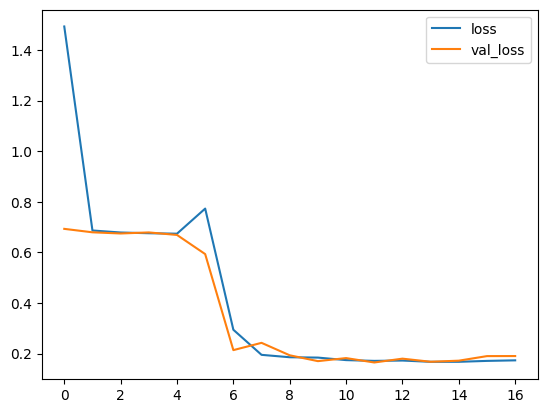

In [42]:
losses[['loss','val_loss']].plot()

<Axes: >

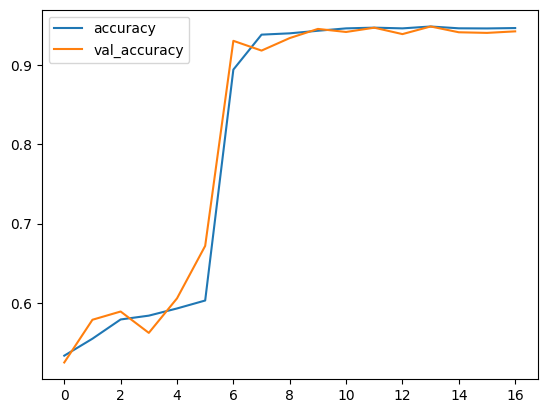

In [43]:
losses[['accuracy','val_accuracy']].plot()

In [47]:
model.evaluate(test_image_gen)

163/163 ━━━━━━━━━━━━━━━━━━━━ 13s 79ms/step - accuracy: 0.9326 - loss: 0.2036


[0.17425033450126648, 0.9419230818748474]

In [44]:
pred = model.predict(test_image_gen)

163/163 ━━━━━━━━━━━━━━━━━━━━ 13s 80ms/step


In [45]:
predictions = pred > 0.5

In [46]:
pd.DataFrame(predictions).value_counts()

0    
True     1320
False    1280
Name: count, dtype: int64

In [48]:
from sklearn.metrics import confusion_matrix,classification_report

In [50]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [52]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1300
           1       0.94      0.95      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



In [53]:
confusion_matrix(test_image_gen.classes, predictions)

array([[1221,   79],
       [  59, 1241]])

In [54]:
para_cell

'/kaggle/input/cell-images/cell_images/train/parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [56]:
from tensorflow.keras.preprocessing import image

In [97]:
my_image = image.load_img(uninfected_cell)

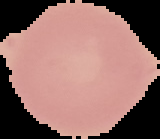

In [98]:
my_image

In [73]:
type(my_image)

PIL.PngImagePlugin.PngImageFile

In [99]:
my_image = my_image.resize((130, 130))

In [100]:
my_image = image.img_to_array(my_image)

In [101]:
type(my_image)

numpy.ndarray

In [102]:
my_image.shape

(130, 130, 3)

In [103]:
my_image = np.expand_dims(my_image, axis=0)

In [104]:
my_image.shape

(1, 130, 130, 3)

In [86]:
labels = {0 : 'parasitized', 1 : 'uninfected'}

In [105]:
result = np.round(model.predict(my_image))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [106]:
result = int(result[0].item())

In [107]:
labels[result]

'uninfected'